In [1]:
# Importação de bibliotecas e módulos
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.random as random
%matplotlib inline

In [2]:
# Opções
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

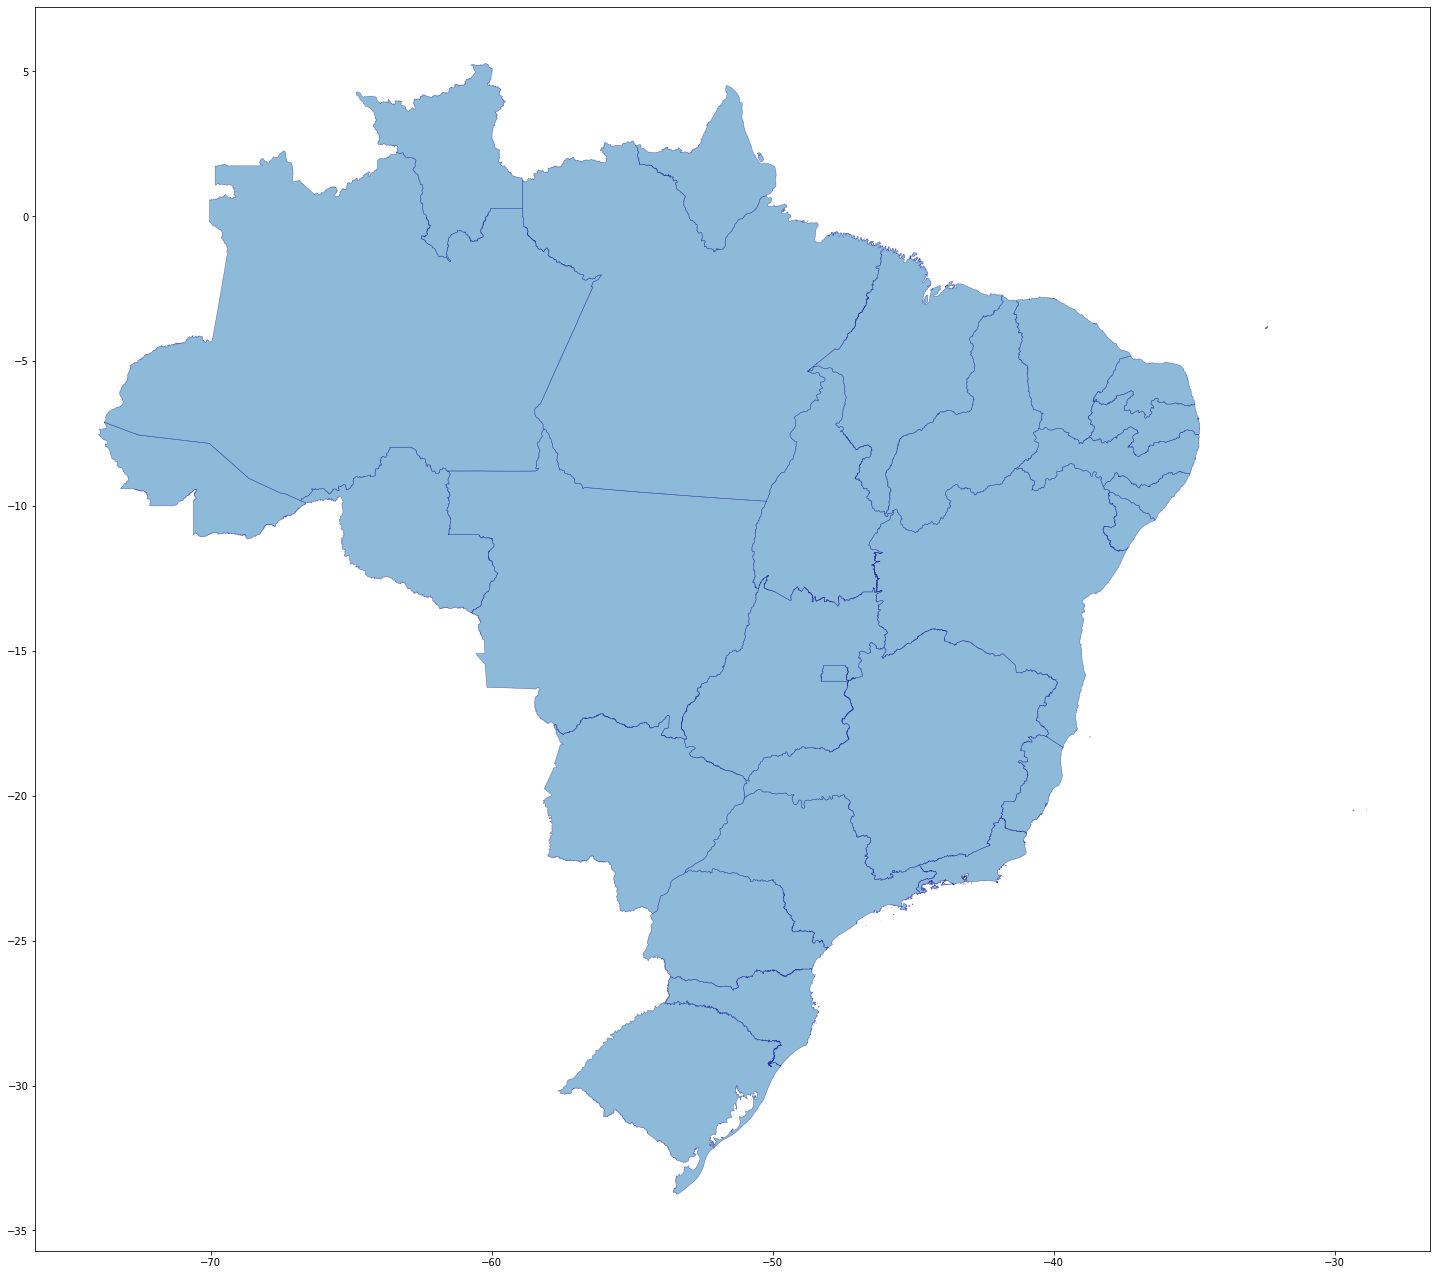

In [3]:
# Abrindo o shape
mapa = gpd.read_file('BR_UF_2020.shp')
ax = mapa.plot(figsize=(25, 25), edgecolor='darkblue', linewidth=0.5, alpha=0.5)
plt.show()

In [4]:
print(mapa.columns)

Index(['CD_UF', 'NM_UF', 'SIGLA_UF', 'NM_REGIAO', 'geometry'], dtype='object')


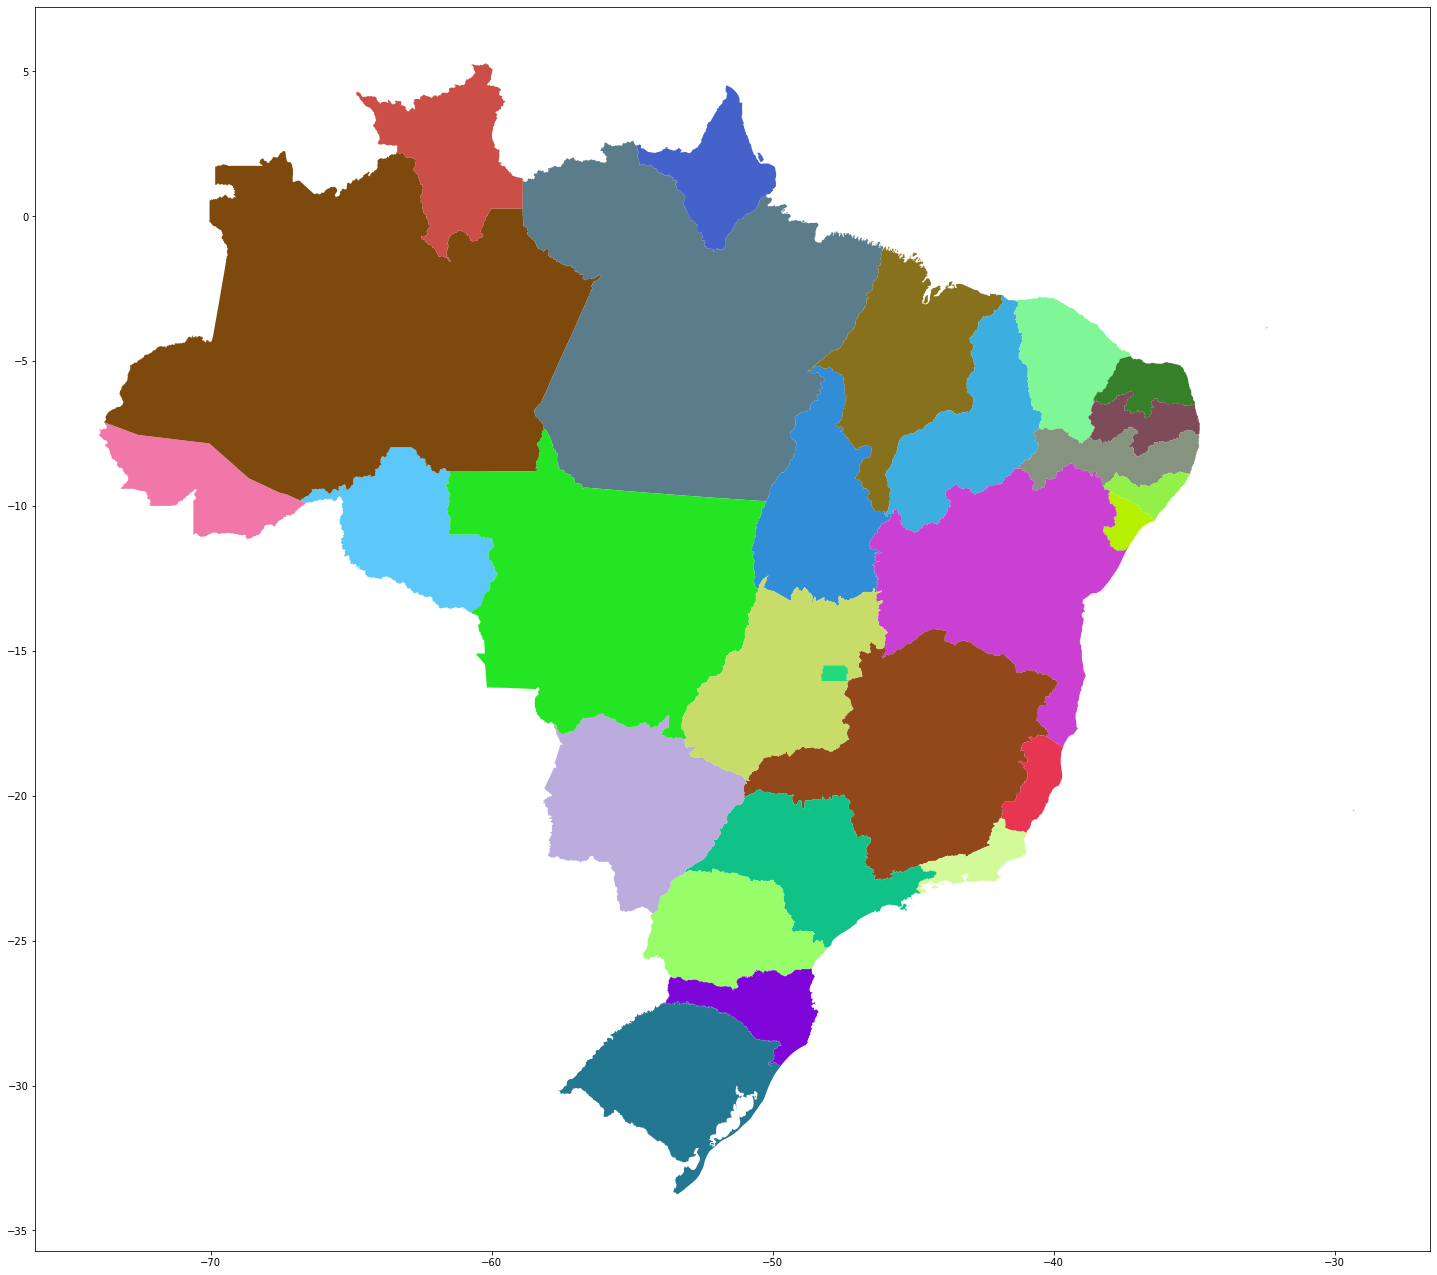

In [5]:
# Fazendo um mapa com cores aleatórias das Regiões do Brasil
random.seed(1)
cods = mapa['NM_UF'].value_counts().index.to_series().reset_index(drop=True).to_frame(name="NM_UF")
cods['cores'] = ["#"+''.join([random.choice(list('0123456789ABCDEF')) for j in range(6)])
             for i in range(len(cods))]
mapa1 = mapa.merge(cods, left_on='NM_UF', right_on='NM_UF', how='outer')
mapa1 = gpd.GeoDataFrame(mapa1)
mapa1.plot(figsize=(25, 25), color=mapa1['cores'])
plt.show()

In [6]:
# Gerando coeficientes de voto
df = pd.read_csv("votacao_partido_munzona_2018_BR.csv", sep=";", encoding='ISO-8859-1')
print(df.columns)
df = df[['NR_TURNO','NR_PARTIDO','QT_VOTOS_NOMINAIS', 'SG_UF']]
df = df[df['NR_TURNO']==2]
df.drop(columns=['NR_TURNO'], inplace=True)
df = pd.pivot_table(df, index=["SG_UF"], columns=["NR_PARTIDO"], values=["QT_VOTOS_NOMINAIS"], aggfunc=np.sum)
df['Coef']= df[('QT_VOTOS_NOMINAIS', 17)]/df[('QT_VOTOS_NOMINAIS', 13)]
df = df['Coef']

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'CD_CARGO', 'DS_CARGO', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'ST_VOTO_EM_TRANSITO',
       'QT_VOTOS_NOMINAIS', 'QT_VOTOS_LEGENDA'],
      dtype='object')


In [7]:
print(df.min(), df.max()) # Os valores vão de 0.29 a 3.4, e 
# 1 equivale a mesma votação para ambos os candidatos em um estado

0.29785556973932215 3.3905400278234477


In [8]:
# Unindo geodataframe com o dataframe
mapa2 = mapa.merge(df, left_on='SIGLA_UF', right_on='SG_UF', how='left')
mapa2 = gpd.GeoDataFrame(mapa2)

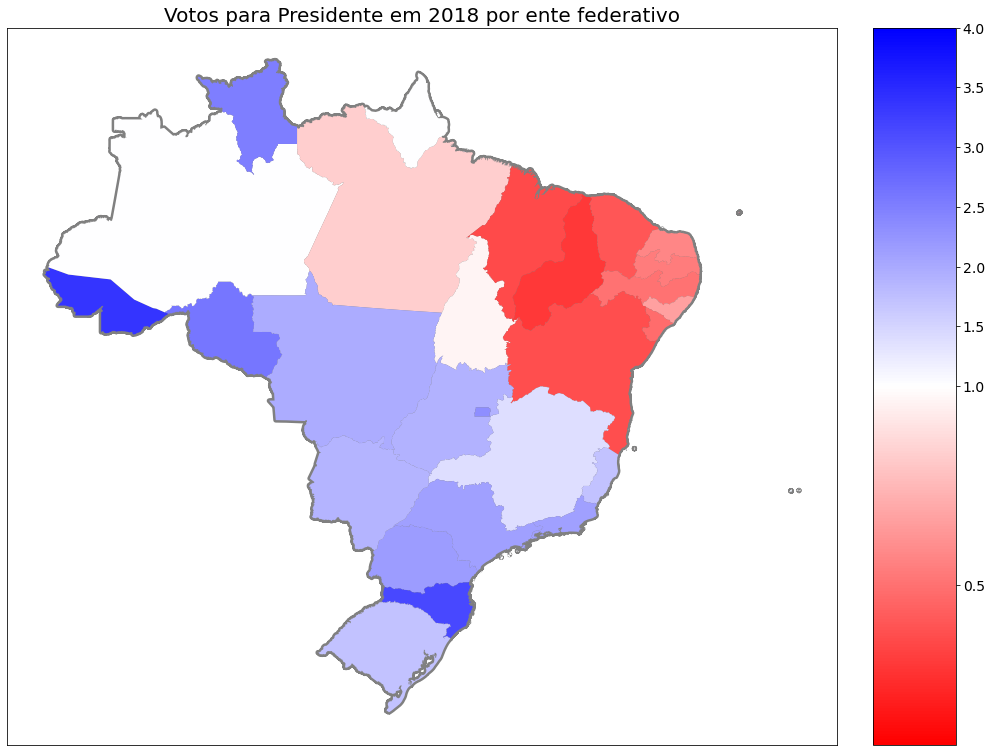

In [9]:
# Gerando o mapa de votos

plt.rcParams.update({'font.size': 14})
cmap_bwr = plt.cm.get_cmap('bwr').reversed()

fig, ax = plt.subplots(figsize=(14,14))
mapa2.plot(ax= ax, edgecolor='gray', linewidth=5, zorder= 1) # Delineando o mapa
ax.tick_params(axis='both', bottom=False, left=False, labelbottom=False, labelleft=False)
offset = mcolors.TwoSlopeNorm(vmin=0.1, vcenter=1, vmax=4) # Distância das cores
cax = make_axes_locatable(ax).append_axes("right", size="10%", pad=0.5) # Barra lateral
mapa2.plot(ax= ax, cax= cax, column='Coef', cmap=cmap_bwr, norm= offset, zorder= 2)
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=offset, cmap=cmap_bwr), cax=cax)
ax.set_title('Votos para Presidente em 2018 por ente federativo', fontsize=20)
plt.tight_layout()
plt.show()

In [10]:
# Aqui, tentei equilibrar cor e porcentagem de votos.
# Mais me importa chamar atenção pros Estados em que cada candidato foi melhor
# do que colorir o mapa com a exata "vantagem" de um candidato sobre o outro

# O trabalho de criar mapas é estético, e o criador tem responsabilidade,
# por meio de sua escala de cores, sobre qual informação é passada!